# Coursework 2 Question 2
## Jaume Ensenyat

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import integrate
from scipy.optimize import fsolve
from scipy import interpolate

%matplotlib qt

In [3]:
Y1 = np.linspace(0,5,11)                                     # defines data for half breadth given in the question (Sec. 1)
Y12 = [i*-1 for i in Y1]                                     # defines the remaining breadth for the whole section (Sec. 1)
Z1 = np.linspace(-10,0,11)                                   # defines data for draught given in the question. (Sec. 1)
Y2 = [0.0,0.8,1.2,1.2,1.4,2.2,3.5,5.0,6.5,7.4]               # defines data for half breadth given in the question. (Sec. 2)
Y22 = [i*-1 for i in Y2]                                     # defines the remaining breadth for the whole section (Sec. 2)
Z2 = [-10.0,-9.7,-8.4,-6.1,-4.3,-2.1,-1.2,-0.55,-0.15,0.0]   # defines data for draught given in the question. (Sec. 2)

In [4]:
A1 = 2*abs(integrate.simps(Y1,Z1))      # integrates to find the area for half of Section 1 and then multiplies by 2
A2 = 2*abs(integrate.simps(Y2,Z2))      # integrates to find the area for half of Section 2 and then multiplies by 2
print('Area Section 1 =', round(A1,2), 'm\u00b2', ', Area Section 2 =', round(A2,2), 'm\u00b2')

Area Section 1 = 50.0 m² , Area Section 2 = 37.92 m²


### For Section 1

For Section 1:
a = -0.388  b = 0.165
Lewis B/T = 1.0
Lewis Cm = 0.5
Lewis Area before scaling = 1.206 m²
Scaled Lewis Area = 50.095 m²
Error in Area = 0.19 %


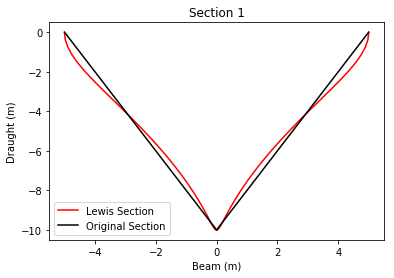

In [5]:
B1 = 10                                                  # original section breadth
T1 = 10                                                  # original section draught
B_T1 = B1/T1                                             # original section aspect ratio B/T
Cm1 = A1/(B1*T1)                                         # original section midship coefficient Cm

def B_T_Lewis(a,b):                                      # function to compute Lewis B/T
    return (2*(1+a+b))/(1-a+b)

def Cm_Lewis(a,b):                                       # function to compute Lewis Area and hence Cm
    A = (np.pi/2)*(1-(a**2)-3*(b**2))
    return A/((2*(1+a+b))*(1-a+b))

def error(a,b,Cm,B_T):                                   # function to calculate the error between original and Lewis values
    Cm_error = Cm-Cm_Lewis(a,b)
    B_T_error = B_T-B_T_Lewis(a,b)
    return (Cm_error,B_T_error)

def f(x):                                                # creates a function f(x) for the error in terms of a and b
    return error(a=x[0],b=x[1], Cm = Cm1 , B_T = B_T1)   

x0 = (0,0)                                               
a,b = fsolve(f,x0)                                       # finds the values of a and b for which f(x) = x0 (i.e. f(x)=0)

print('For Section 1:')
print('a =', round(a,3),' b =', round(b,3))
print('Lewis B/T =', round(B_T_Lewis(a,b),2))
print('Lewis Cm =', round(Cm_Lewis(a,b),3))
print('Lewis Area before scaling =', round(Cm_Lewis(a,b)*((2*(1+a+b))*(1-a+b)),3), 'm\u00b2')

def zeta(theta):                                         # a function to evaluate the Lewis Section
    return np.exp(1j*theta)+a*np.exp(-1j*theta)+b*np.exp(-3j*theta)

theta1 = np.linspace(-np.pi,0)                           # defines a range of angles to evaluate the Lewis Section
Z=[]

for i in theta1:                                         # evaluates the mapping at each interval of theta
    Z.append(zeta(i))

Y_r1 = [np.real(i) for i in Z]                           # takes the real part of the mapping (i.e. breadth)
Z_im1 = [np.imag(i) for i in Z]                          # takes the imaginary part of the mapping (i.e. draught)

s1t = -T1/np.min(Z_im1)                                  # evaluates the scaling factor T0/T
B1plt = [i*s1t for i in Y_r1]                            # scales the breadth to match the original section
T1plt = [i*s1t for i in Z_im1]                           # scales the draught to match the original section

print('Scaled Lewis Area =', round(Cm_Lewis(a,b)*((2*(1+a+b))*(1-a+b))*s1t**2,3), 'm\u00b2')
print('Error in Area =', round((Cm_Lewis(a,b)*((2*(1+a+b))*(1-a+b))*s1t**2-A1)/A1*100, 2), '%')

plt.plot(B1plt,T1plt,'r-',label='Lewis Section')
plt.plot(Y1,Z1,'k-',label='Original Section')
plt.plot(Y12,Z1,'k-')
plt.title('Section 1')
plt.xlabel('Beam (m)')
plt.ylabel('Draught (m)')
plt.legend()
plt.show()

### For Section 2

For Section 2:
a = -0.202  b = 0.353
Lewis B/T = 1.48
Lewis Cm = 0.256
Lewis Area before scaling = 0.918 m²
Scaled Lewis Area = 38.029 m²
Error in Area = 0.29 %


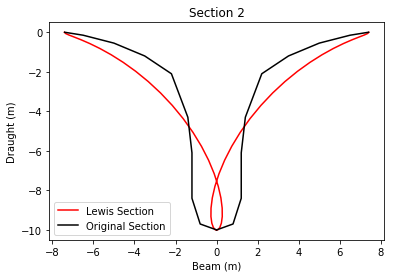

In [6]:
B2 = 14.8
T2 = 10
B_T2 = B2/T2
Cm2 = A2/(B2*T2)

def B_T_Lewis(a2,b2):
    return (2*(1+a2+b2))/(1-a2+b2)

def Cm_Lewis(a2,b2):
    A = (np.pi/2)*(1-(a2**2)-3*(b2**2))
    return A/((2*(1+a2+b2))*(1-a2+b2))

def error(a2,b2,Cm,B_T):
    Cm_error = Cm-Cm_Lewis(a2,b2)
    B_T_error = B_T-B_T_Lewis(a2,b2)
    return (Cm_error,B_T_error)

def f(x):
    return error(a2=x[0],b2=x[1], Cm = Cm2 ,B_T = B_T2)

x0 = (0,0)
a2,b2 = fsolve(f,x0)

print('For Section 2:')
print('a =', round(a2,3),' b =', round(b2,3))
print('Lewis B/T =', round(B_T_Lewis(a2,b2),2))
print('Lewis Cm =', round(Cm_Lewis(a2,b2),3))
print('Lewis Area before scaling =', round(Cm_Lewis(a2,b2)*((2*(1+a2+b2))*(1-a2+b2)),3), 'm\u00b2')

def zeta2(theta):
    return np.exp(1j*theta)+a2*np.exp(-1j*theta)+b2*np.exp(-3j*theta)

theta2 = np.linspace(-np.pi,0)
Z_2=[]

for i in theta2:
    Z_2.append(zeta2(i))

Y_r2 = [np.real(i) for i in Z_2]
Z_im2 = [np.imag(i) for i in Z_2]
s2t = -T2/np.min(Z_im2)
B2plt = [i*s2t for i in Y_r2]
T2plt = [i*s2t for i in Z_im2]

print('Scaled Lewis Area =', round(Cm_Lewis(a2,b2)*((2*(1+a2+b2))*(1-a2+b2))*s2t**2,3), 'm\u00b2')
print('Error in Area =', round((Cm_Lewis(a2,b2)*((2*(1+a2+b2))*(1-a2+b2))*s2t**2-A2)/A2*100, 2), '%')

plt.plot(B2plt,T2plt,'r-',label='Lewis Section')
plt.plot(Y2,Z2,'k-',label='Original Section')
plt.plot(Y22,Z2,'k-')
plt.title('Section 2')
plt.xlabel('Beam (m)')
plt.ylabel('Draught (m)')
plt.legend()
plt.show()

For Ellipse:
a = 0.333  b = -0.0
Lewis B/T = 4.0
Lewis Cm = 0.785
Lewis Area before scaling = 1.396 m²
Scaled Lewis Area = 0.785 m²
Error in Area = 0.0 %


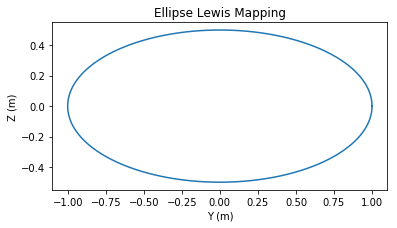

In [7]:
Btest = 2                       # ellipse with width 2
Ttest = 0.5                     # ellipse with height 1, which has been divided by 2 to take the same form as a ship section
B_Ttest = Btest/Ttest
Atest = np.pi/4
Cmtest = Atest/(Btest*Ttest)

def B_T_Lewis(atest,btest):
    return (2*(1+atest+btest))/(1-atest+btest)

def Cm_Lewis(atest,btest):
    A = (np.pi/2)*(1-(atest**2)-3*(btest**2))
    return A/((2*(1+atest+btest))*(1-atest+btest))

def error(atest,btest,Cm,B_T):
    Cm_error = Cm-Cm_Lewis(atest,btest)
    B_T_error = B_T-B_T_Lewis(atest,btest)
    return (Cm_error,B_T_error)

def f(x):
    return error(atest=x[0],btest=x[1], Cm = Cmtest ,B_T = B_Ttest)

x0 = (0,0)
atest,btest = fsolve(f,x0)

print('For Ellipse:')
print('a =', round(atest,3),' b =', round(btest,3))
print('Lewis B/T =', round(B_T_Lewis(atest,btest),2))
print('Lewis Cm =', round(Cm_Lewis(atest,btest),3))
print('Lewis Area before scaling =', round(Cm_Lewis(atest,btest)*((2*(1+atest+btest))*(1-atest+btest)),3), 'm\u00b2')

def zetatest(theta):
    return np.exp(1j*theta)+atest*np.exp(-1j*theta)+btest*np.exp(-3j*theta)

thetatest = np.arange(0,2*np.pi,0.01)      # range from 0 to 2pi since we are mapping a full ellipse and not a ship section
Z_test=[]

for i in thetatest:
    Z_test.append(zetatest(i))

Y_rtest = [np.real(i) for i in Z_test]
Z_imtest = [np.imag(i) for i in Z_test]
stest = -Ttest/np.min(Z_imtest)
Btestplt = [i*stest for i in Y_rtest]
Ttestplt = [i*stest for i in Z_imtest]

print('Scaled Lewis Area =', round(Cm_Lewis(atest,btest)*((2*(1+atest+btest))*(1-atest+btest))*stest**2,3), 'm\u00b2')
print('Error in Area =',round((Cm_Lewis(atest,btest)*((2*(1+atest+btest))*(1-atest+btest))*stest**2-Atest)/Atest*100,2),'%')

plt.plot(Btestplt,Ttestplt)
plt.title('Ellipse Lewis Mapping')
plt.xlabel('Y (m)')
plt.ylabel('Z (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [8]:
def added_mass(a,b,rho=1):                    # myy as defined in the notes
    return (np.pi*rho/2)*((1+a)**2+3*b**2)

def c22(myy, B, rho=1):                       # c22 as defined in Q2
    return myy/(rho*np.pi*B**2/8)

Myy1 = added_mass(a,b,1025)*s1t**2           
Myy2 = added_mass(a2,b2,1025)*s2t**2
Myytest = 2*added_mass(atest,btest,1025)*stest**2
MyyNewmantest = 1025*np.pi*(Btest/2)**2
perc_difftest = ((added_mass(atest,btest,1025)*2*stest**2-1025*np.pi)/1025*np.pi)*100

print('Myy Section 1:', round(Myy1,2), 'kg/m , c22 Section 1:', round(c22(Myy1, B1, 1025),4))
print('Myy Section 2:', round(Myy2,2), 'kg/m , c22 Section 2:', round(c22(Myy2, B2, 1025),4))
print('Myy Ellipse Lewis:', round(Myytest,2), 'kg/m , c22 Section 2:', round(c22(Myytest/2, Btest, 1025),4))
print('Myy Ellipse Newman:', round(MyyNewmantest,2), 'kg/m')
print('Percentage difference between Lewis and Newman Myy for Ellipse:', round(perc_difftest,3), '%')


Myy Section 1: 30476.32 kg/m , c22 Section 1: 0.7571
Myy Section 2: 67468.14 kg/m , c22 Section 2: 0.7652
Myy Ellipse Lewis: 3220.15 kg/m , c22 Section 2: 1.0
Myy Ellipse Newman: 3220.13 kg/m
Percentage difference between Lewis and Newman Myy for Ellipse: 0.006 %


### Percentage errors

The absolute difference between the original and the Lewis section using discrete points is used as a measure of error in the geometry of the Lewis sections.

In [9]:
# Section 1
theta1 = np.linspace(-np.pi/2,0,11)  # range for half a section
Z=[]

for i in theta1:
    Z.append(zeta(i))

Y_r1 = [np.real(i) for i in Z]                                
Z_im1 = [np.imag(i) for i in Z]

s1t = -T1/np.min(Z_im1)
B1plt = [i*s1t for i in Y_r1]
T1plt = [i*s1t for i in Z_im1]

def f(z, Y, Z):                      # creates spline given Y, Z data and returns the half-breadth for a specified draught
    tck = interpolate.splrep(Z, Y)
    return interpolate.splev(z, tck)

z = np.linspace(-10,0)                                 
data1a = [f(i, Y1, Z1) for i in z]
data1b = [f(i, B1plt, T1plt) for i in z]

diff = [data1a[i]-data1b[i] for i in np.arange(0,50,1)]
per_diff = [(diff[i]/data1a[i])*100 for i in np.arange(0,50,1)]
per_diffabs = [abs(per_diff[i]) for i in np.arange(0,50,1)]
print('Percentage difference Section 1 =', round(np.mean(per_diffabs),2), '%')

# Section 2
theta2 = np.linspace(-np.pi/2,0,10)
Z_2=[]

for i in theta2:
    Z_2.append(zeta2(i))

Y_r2 = [np.real(i) for i in Z_2]
Z_im2 = [np.imag(i) for i in Z_2]
s2t = -T2/np.min(Z_im2)
B2plt = [i*s2t for i in Y_r2]
T2plt = [i*s2t for i in Z_im2]

z = np.linspace(-10,0)
data2a = [f(i, Y2, Z2) for i in z]
data2b = [f(i, B2plt, T2plt) for i in z]

diff2 = [data2a[i]-data2b[i] for i in np.arange(0,50,1)]
per_diff2 = [(diff2[i]/data2a[i])*100 for i in np.arange(0,50,1)]
per_diff2abs = [abs(per_diff2[i]) for i in np.arange(0,50,1)]
print('Percentage difference Section 2 =', round(np.mean(per_diff2abs),2), '%')


Percentage difference Section 1 = 21.01 %
Percentage difference Section 2 = 69.79 %
